In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [76]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [25]:
!pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


You should consider upgrading via the 'c:\users\girleffect\python\python38\python.exe -m pip install --upgrade pip' command.


In [26]:
!pip install -U statsmodels

You should consider upgrading via the 'c:\users\girleffect\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

<AxesSubplot:>

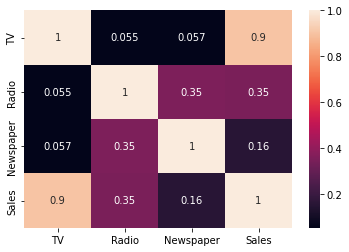

In [12]:
sns.heatmap(df.corr(),annot=True)

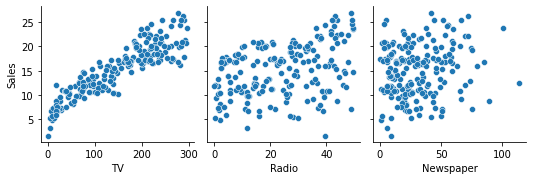

In [23]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='TV', ylabel='Sales'>

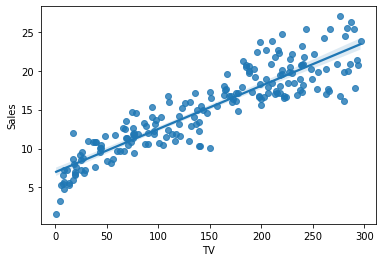

In [19]:
sns.regplot(x='TV',y='Sales',data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

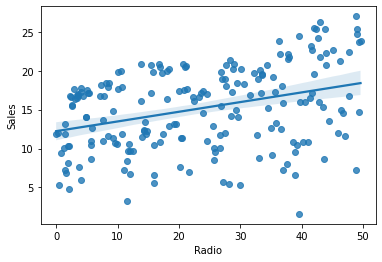

In [20]:
sns.regplot(x='Radio',y='Sales',data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

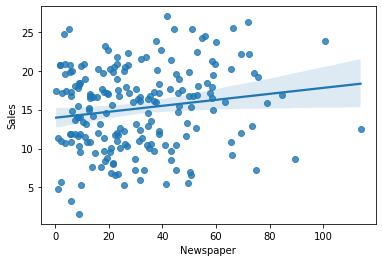

In [21]:
sns.regplot(x='Newspaper',y='Sales',data=df)

# create x and y
# create train and test sets (70-30) (80-20)
# train model on training set, learning the coefficients B0 and B1
# evaluate the model

In [31]:
#create x and y
X=df['TV']
y=df['Sales']

In [35]:
#create train and test sets (70-30) (80-20)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70,test_size=.30,random_state=100)

In [39]:
y_test.shape

(60,)

In [42]:
 #y=mx + c By defail Statsmodel will make line passing through origin where c=0
X_train_sm=sm.add_constant(X_train)

In [45]:
X_train_sm.head(2)

,const,TV
74,1.0,213.4
3,1.0,151.5


In [47]:
#train model on training set, learning the coefficients B0 and B1
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()



In [48]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [49]:
#Sales= 6.94 + 0.054 * TV

In [50]:
#evaluate the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 28 May 2022   Prob (F-statistic):           1.52e-52
Time:                        18:46:53   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

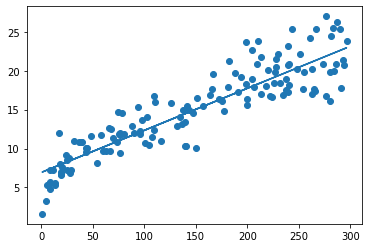

In [52]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.94+.054*X_train)

In [56]:
#Residual analysis. Check if assumptions are correct
#error=y_train-y_train_pred

y_train_pred=lr_model.predict(X_train_sm)

In [58]:
res=y_train-y_train_pred

c:\users\girleffect\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

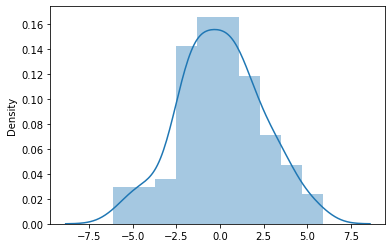

In [61]:
plt.plot()
sns.distplot(res)

# so mean of res (residual) is 0. So our assumption is correct and shape is also normally distributed

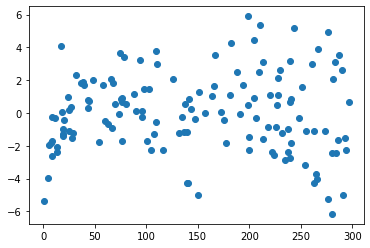

In [62]:
#look for patterns in residual, We should not find residuals
plt.scatter(X_train,res)

In [65]:
lm=LinearRegression()

In [70]:
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [67]:
lm.fit(X_train_lm,y_train)

LinearRegression()

In [68]:
lm.coef_

array([0.05454575])

In [69]:
lm.intercept_

6.948683200001357

In [71]:
y_train_pred=lm.predict(X_train_lm)

In [72]:
y_test_pred=lm.predict(X_test_lm)

In [77]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8157933136480389

In [78]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7921031601245662